Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
55000 (55000, 784) (55000, 10)
5000 (5000, 784) (5000, 10)


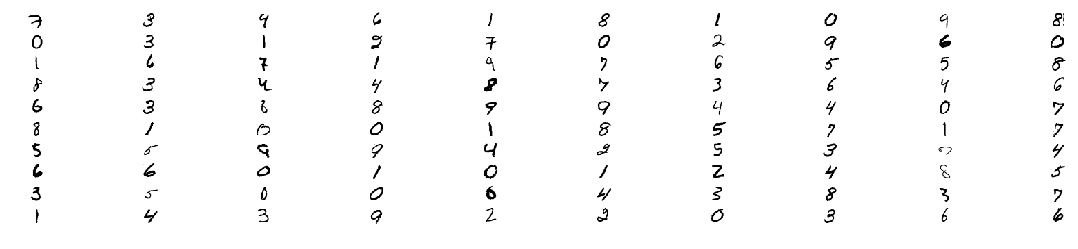

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

ntrain = mnist.train.num_examples
Xtrain = mnist.train.images
ytrain = mnist.train.labels
print(ntrain,Xtrain.shape,ytrain.shape)

ntest = mnist.test.num_examples
Xtest = mnist.test.images
ytest = mnist.test.labels

nvalidation = mnist.validation.num_examples
Xvalidation = mnist.validation.images
yvalidation = mnist.validation.labels
print(nvalidation,Xvalidation.shape,yvalidation.shape)

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plt.figure(figsize=(20,40))
for iteration in range(100):
    plt.subplot(100, 10, iteration + 1)
    plot_image(Xtrain[iteration,:])


In [5]:
print(ytrain[1,:])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


0.046337338059 0.0613352094354 85.4927 85.28
0.0393861996897 0.047321805476 85.6909 85.6
0.0380629090496 0.0381894555065 85.7673 85.68
0.0380608796419 0.0382899916824 85.7655 85.68
0.038060759514 0.0382518940313 85.7691 85.68
0.0380607681602 0.0382580233326 85.7655 85.68
0.0380614096618 0.0382580700387 85.7618 85.7
0.0380645438552 0.0381309687926 85.76 85.72
0.0380747120261 0.0379538922636 85.76 85.74
0.0380986316516 0.0378511866226 85.74 85.66
0.0381530302881 0.037748789675 85.7091 85.72
0.0383499758299 0.0376879050545 85.7582 85.92
0.0393274425753 0.038382040165 85.7018 86.52
0.0429088330901 0.0420375222288 84.7927 85.12
0.0564398209443 0.0559743326828 79.7636 79.56
86.28


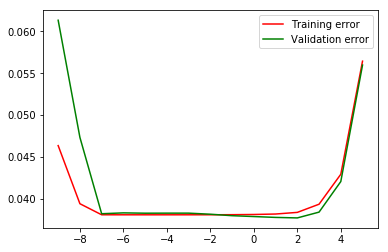

In [6]:
# Ridge regression
n_inputs = 28 * 28

lam = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32,[None, n_inputs])
Xmean = np.mean(Xtrain,axis=0)
Xm = X - Xmean
y = tf.placeholder(tf.float32,[None, 10 ])
ymean = np.mean(ytrain,axis=0) # bias of the model
ym = y - ymean
XmT = tf.transpose(Xm)
XmTXm = tf.matmul(XmT, Xm)
Minv = tf.matrix_inverse(XmTXm + lam * np.eye(n_inputs))
theta = tf.matmul(Minv,tf.matmul(XmT, ym)) # linear coefficient of the model

yp = tf.matmul(Xm,theta)+ymean # predicted y

y1 = tf.placeholder(tf.float32,[None, 10])
y2 = tf.placeholder(tf.float32,[None, 10])
acc = 100.0*tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y1,axis=1),tf.argmax(y2,axis=1)),tf.float32))

# hyper parameter range
lamda_range = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]

train_error = np.zeros((15,1))
validation_error = np.zeros((15,1))
with tf.Session() as sess:
    best_validation_err=1e10
    cnt=0
    for lam_val in lamda_range:
        # compute model
        theta_value = theta.eval(feed_dict={X:Xtrain, y:ytrain,lam:lam_val})
        
        # prediction on training set
        yp_train = yp.eval(feed_dict={X:Xtrain, theta:theta_value})
        acc_train = acc.eval(feed_dict={y1:ytrain, y2:yp_train})
        regerr_train = tf.reduce_mean(tf.square(yp_train-ytrain)).eval()
        train_error[cnt] = regerr_train
        
        # prediction on validation set
        yp_validation = yp.eval(feed_dict={X:Xvalidation, theta:theta_value})
        acc_validation = acc.eval(feed_dict={y1:yvalidation, y2:yp_validation})
        regerr_validation = tf.reduce_mean(tf.square(yp_validation-yvalidation)).eval()        
        validation_error[cnt] = regerr_validation
        
        cnt = cnt + 1
        
        # get the best model
        if best_validation_err > regerr_validation:
            best_theta = theta_value
            best_validation_err = regerr_validation
        print(regerr_train, regerr_validation, acc_train, acc_validation)
    
    # Now that the model is trained, it is the test time!
    yp_test = yp.eval(feed_dict={X:Xtest, theta:best_theta})
    acc_test = acc.eval(feed_dict={y1:ytest, y2:yp_test})
    print(acc_test)

# plot error curve
%matplotlib inline
plt.plot(np.log10(lamda_range),train_error,'r',label='Training error')
plt.plot(np.log10(lamda_range),validation_error,'g',label='Validation error')
plt.legend(loc='upper right')
plt.show()

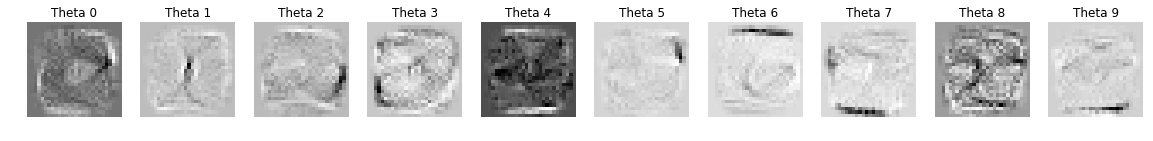

In [8]:
import matplotlib
import matplotlib.pyplot as plt

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plt.figure(figsize=(20,40))
for iteration in range(10):
    plt.subplot(1, 10, iteration + 1)
    plot_image(best_theta[:,iteration])
    plt.title('Theta ' + str(iteration))